In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [58]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date",parse_dates = ['date'])

In [59]:
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]


In [60]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [87]:
df_bar = df.copy(deep=True)
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(["year","month"])['value'].mean()
#df_bar= df_bar.reset_index()#.sort_values(by=['year','month'])
df_bar= df_bar.unstack()

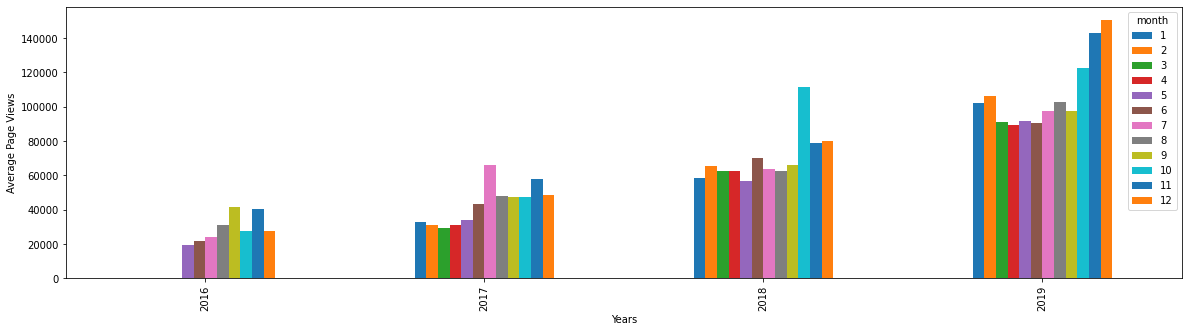

In [88]:
fig = df_bar.plot.bar(legend=True, figsize=(20,5),ylabel = "Average Page Views",xlabel= "Years").figure
#plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])